In [4]:
import sys
print("Current Python interpreter:", sys.executable)
print("Version:", sys.version)

Current Python interpreter: /workspaces/eng-ai-agents/.venv/bin/python
Version: 3.11.9 (main, Aug 14 2024, 03:58:18) [GCC 6.3.0 20170516]


In [5]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

device(type='cpu')

## Q1 Information Theory

In [6]:
import torch

p = torch.tensor([
    [1/8, 1/16, 1/32, 1/32],
    [1/16, 1/8, 1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4,  0,    0,    0]
], dtype=torch.float)

px = p.sum(dim=0)
py = p.sum(dim=1)

def e(a):
    m = a>0
    b = a[m]
    return -(b*torch.log2(b)).sum()

hx = e(px)
hy = e(py)
hxy = e(p.view(-1))
hxgy = hxy - hy
hygx = hxy - hx

### a

In [7]:
val_a = abs(hxgy.item() - hygx.item())

if val_a < 1e-9:
    print("Yes")
else:
    print("No")

No


### b

In [8]:
lhs = hx - hxgy
rhs = hy - hygx
val_b = abs(lhs.item() - rhs.item())

if val_b < 1e-9:
    print("Yes")
else:
    print("No")

Yes


### c

In [9]:
ixy = hx + hy - hxy
print(ixy.item())

0.375


## Q2 MLE

### Task1

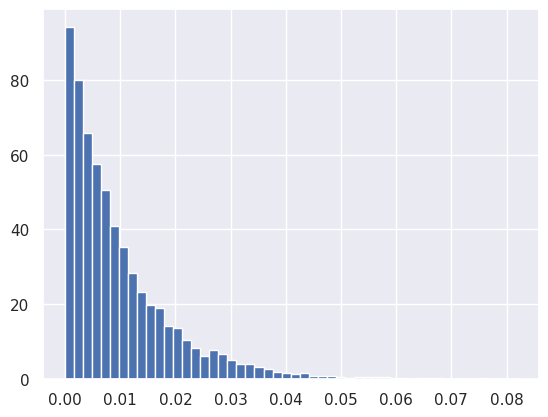

In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
l=100
n=10000
x=np.random.exponential(1/l,n)
plt.hist(x,bins=50,density=True)
plt.show()

### Task 2

a 38.464426318536866


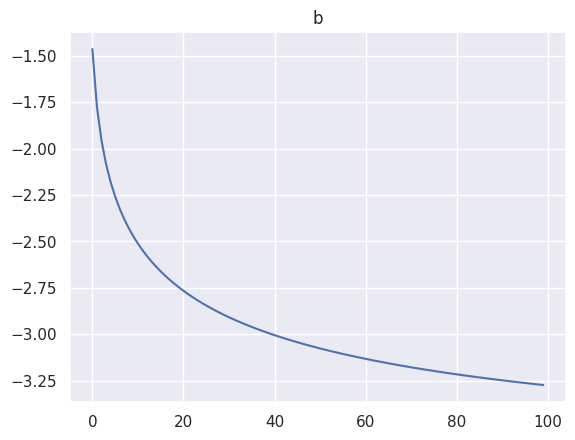

In [11]:
lr=0.001
ep=100
p=1.0
h=[]
def negll(a,b):
    return -np.log(b)+b*a
for _ in range(ep):
    idx=np.random.permutation(n)
    for i in idx:
        g=-1/p + x[i]
        p-=lr*g
    h.append(np.mean([negll(v,p) for v in x]))
print("a", p)
plt.plot(h)
plt.title("b")
plt.show()

## Q3 Linear Regression

In [10]:
# pip install git+https://github.com/ctgk/PRML.git

  Cloning https://github.com/ctgk/PRML.git to /tmp/pip-req-build-zi2v46kc
  Running command git clone --filter=blob:none --quiet https://github.com/ctgk/PRML.git /tmp/pip-req-build-zi2v46kc
  Resolved https://github.com/ctgk/PRML.git to commit 0aba5c8b12adf99d53f3471b7cf4fa117d64acc8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

np.random.seed(1234)

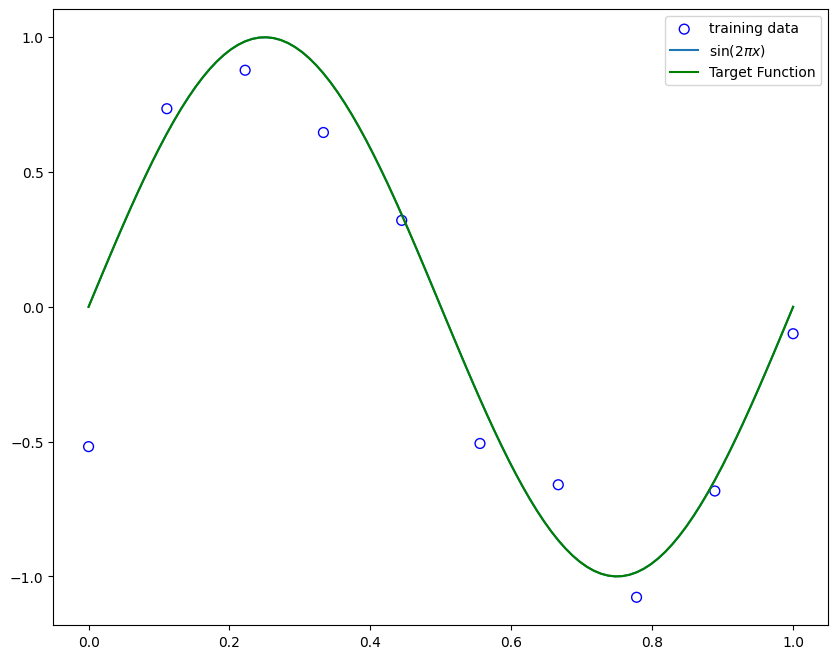

In [3]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

plt.figure(figsize=[10,8])
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'prml.features'